<a href="https://colab.research.google.com/github/Benqui/facial-recognition-on-keras/blob/main/Programa_reconocimiento_emociones_keras_pre_mark03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install brewer2mpl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import cv2
print("OpenCV-Python Version {}".format(cv2.__version__))

OpenCV-Python Version 4.7.0


In [3]:
import PIL
import io
import html
import time

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# from IPython.display import display, Javascript
# from google.colab.output import eval_js
# from base64 import b64decode

# def take_photo(filename='photo.jpg', quality=0.8):
#   js = Javascript('''
#     async function takePhoto(quality) {
#       const div = document.createElement('div');
#       const video = document.createElement('video');
#       video.style.display = 'block';
#       const stream = await navigator.mediaDevices.getUserMedia({video: true});

#       document.body.appendChild(div);
#       div.appendChild(video);
#       video.srcObject = stream;
#       await video.play();

#       // Resize the output to fit the video element.
#       google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

#       await new Promise((resolve) => setTimeout(resolve, 5000)); // Delay of 5 seconds.

#       const canvas = document.createElement('canvas');
#       canvas.width = video.videoWidth;
#       canvas.height = video.videoHeight;
#       canvas.getContext('2d').drawImage(video, 0, 0);
#       stream.getVideoTracks()[0].stop();
#       div.remove();
#       return canvas.toDataURL('image/jpeg', quality);
#     }
#     ''')
#   display(js)
#   data = eval_js('takePhoto({})'.format(quality))
#   binary = b64decode(data.split(',')[1])
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return filename


In [12]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import dlib
import numpy as np
import io

def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    detector = dlib.get_frontal_face_detector()
    faces = detector(gray)
    return faces

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => setTimeout(resolve, 5000)); // Delay of 5 seconds.

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();

            const dataUrl = canvas.toDataURL('image/jpeg', quality);
            return dataUrl;
        }
    ''')

    display(js)

    try:
        data = eval_js('takePhoto({})'.format(quality))
        binary = b64decode(data.split(',')[1])
        image = np.array(bytearray(binary), dtype=np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        faces = detect_faces(image)

        # Draw rectangles around the detected faces
        for face in faces:
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.imwrite(filename, image)
        return filename
    except Exception as err:
        print(str(err))




In [20]:
import cv2
from google.colab.patches import cv2_imshow

def cropped_face_only():
    face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
    image = cv2.imread('/content/photo.jpg')
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    # Iterate over the detected faces
    for (x, y, w, h) in faces:
        if w > 100 and h > 100:
            # Define the region of interest (ROI) which is the face
            roi = image[y:y+h, x:x+w]
            # Display the cropped face
            cv2_imshow(roi)
            # Save the cropped face
            cv2.imwrite('/content/cropped_face.jpg', roi)
            break



In [37]:
def get_highest_value_position(array):
    # Get the index of the maximum value in the array
    max_index = np.argmax(array)
    
    # Convert the index to the corresponding position
    position = np.unravel_index(max_index, array.shape)
    
    return position

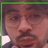

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 14,717,766
Trainable params: 14,717,766
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 655ms/step


In [28]:
# from PIL import Image
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input

# def pred_emotions():
#   img_path = '/content/cropped_face.jpg'
#   # Load the image using PIL
#   img = Image.open(img_path).resize((48, 48))
#   # Display the image
#   display(img)
#   X = image.img_to_array(img)
#   X = np.expand_dims(X, axis=0)
#   model = tf.keras.models.load_model('/content/drive/MyDrive/Escuela/ia/reconocer-jetas/modelos_propios/modelo_mkar7-vgg16-160-mark2.h5')
#   model.summary()
#   X = preprocess_input(X)
#   preds = model.predict(X)
#   return preds

# preds = pred_emotions()


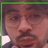

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense (Dense)               (None, 7)                 3591      
                                                                 
Total params: 14,720,327
Trainable params: 14,719,303
Non-trainable params: 1,024
________________________________________

In [32]:
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def pred_emotions():
  img_path = '/content/cropped_face.jpg'
  # Load the image using PIL
  img = Image.open(img_path).resize((48, 48))
  # Display the image
  display(img)
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  model = tf.keras.models.load_model('/content/drive/MyDrive/Escuela/ia/reconocer-jetas/modelos_propios/modelo_mkar7-vgg16-160.h5')
  model.summary()
  X = preprocess_input(X)
  preds = model.predict(X)
  # np.set_printoptions(precision=4)
  print(preds)  # Print the predictions
  return preds

# preds = pred_emotions()


In [6]:
# face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

<IPython.core.display.Javascript object>

Saved to photo.jpg


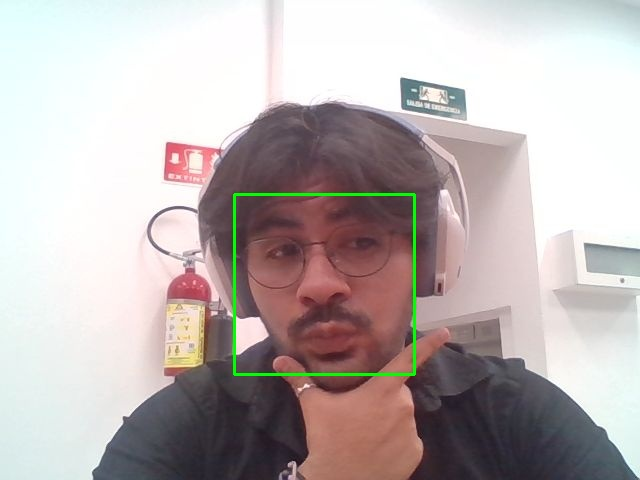

In [11]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

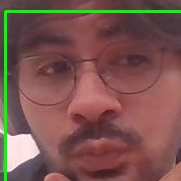

In [21]:
cropped_face_only()

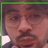

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 14,717,766
Trainable params: 14,717,766
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 214ms/step


In [29]:
preds = pred_emotions()

In [30]:
print(preds)

[[0. 0. 0. 0. 1. 0.]]


In [34]:
# Convert the NumPy array to a Python list
preds_list = preds.flatten().tolist()

# Print the predictions with higher precision
for pred in preds_list:
    print("{:.4f}".format(pred), end=" ")

0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 

In [35]:
if isinstance(preds, np.ndarray):
    print("Variable is an array")
else:
    print("Variable is not an array")

Variable is an array


In [49]:
emotion = {'Angry': 0, 'Disgust':1 ,'Fear': 2, 'Happy': 3, 'Sad': 4, 'Surprise': 5, 'Neutral': 6}

In [50]:
alfa = get_highest_value_position(preds)
print(preds)
print(type(alfa))
print(alfa)
print(type(emotion))

[[0. 0. 0. 0. 0. 1. 0.]]
<class 'tuple'>
(0, 5)
<class 'dict'>


In [51]:
check = alfa[-1]

In [52]:
for key, value in emotion.items():
  if value == check:
      print("The key associated with the value is:", key)
      # emotion_arr.append(key)
      break



The key associated with the value is: Surprise
